In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')

library('limma')
library('edgeR')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
readxl::excel_sheets('1102025Chondrosarcoma Nanostring Normalized.xlsx')

[1] "Chondrosarcoma Nanostring Norma" "Raw data"                       
[3] "1102025Chondrosarcoma Nanostrin"

In [3]:
qc_tbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='1102025Chondrosarcoma Nanostrin'
    ) %>%
    rename(`sample_name_simple`=`Sample Name`)

New names:
• `` -> `...6`


In [4]:
ns_colnames <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        n_max=1
    ) %>%
    colnames()

ns_colnames

[1] "Probe Name"                                      
 [2] "Accession #"                                     
 [3] "Class Name"                                      
 [4] "20250102_30102954030325-01_10P_07.RCC"           
 [5] "20250102_30102954030325-01_12T_11.RCC"           
 [6] "20250102_30102954030325-01_16P_05.RCC"           
 [7] "20250102_30102954030325-01_17P_10.RCC"           
 [8] "20250102_30102954030325-01_18P_04.RCC"           
 [9] "20250102_30102954030325-01_2T_02.RCC"            
[10] "20250102_30102954030325-01_3P_03.RCC"            
[11] "20250102_30102954030325-01_6P_06.RCC"            
[12] "20250102_30102954030325-01_6T_08.RCC"            
[13] "20250102_30102954030325-01_8P_09.RCC"            
[14] "20250102_30102954030325-01_9P_01.RCC"            
[15] "20250102_30102954030325-01_panel standard_12.RCC"
[16] "20250102_30102954060325-01_11P_05.RCC"           
[17] "20250102_30102954060325-01_12P_02.RCC"           
[18] "20250102_30102954060325-01_13P_10.RCC"           
[19] "20250102_30102954060325-01_13T_09.RCC"           
[20] "20250102_30102954060325-01_15T_08.RCC"           
[21] "20250102_30102954060325-01_16T_01.RCC"           
[22] "20250102_30102954060325-01_19P_03.RCC"           
[23] "20250102_30102954060325-01_19T_11.RCC"           
[24] "20250102_30102954060325-01_3T_07.RCC"            
[25] "20250102_30102954060325-01_5T_04.RCC"            
[26] "20250102_30102954060325-01_8T_06.RCC"            
[27] "20250102_30102954060325-01_panel standard_12.RCC"
[28] "20250103_30102954230325-01_15P_04.RCC"           
[29] "20250103_30102954230325-01_17T_02.RCC"           
[30] "20250103_30102954230325-01_1T_03.RCC"            
[31] "20250103_30102954230325-01_4T_05.RCC"            
[32] "20250103_30102954230325-01_5P_01.RCC"            
[33] "20250103_30102954230325-01_panel standard_06.RCC"

In [5]:
cnt_wtbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        skip=2,
        col_names=ns_colnames
    ) %>%
    select(
        -`20250102_30102954030325-01_panel standard_12.RCC`,
        -`20250102_30102954060325-01_panel standard_12.RCC`, 
        -`20250103_30102954230325-01_panel standard_06.RCC`
    )

cnt_wtbl %>%
    head()

Probe Name,Accession #,Class Name,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_18P_04.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,⋯,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_1T_03.RCC,20250103_30102954230325-01_4T_05.RCC,20250103_30102954230325-01_5P_01.RCC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NM_000014.4,Endogenous,4593,27,22,6,16,6406,14024,⋯,344,2785,9979,45,14508,16,10,123,373,43
ACVR1C,NM_145259.2,Endogenous,51,11,18,5,7,19,30,⋯,181,208,12,9,40,8,8,3,20,2
ADAM12,NM_003474.5,Endogenous,172,19,15,7,23,934,590,⋯,267,1382,637,17,849,18,8,30,26,6
ADGRE1,NM_001256252.1,Endogenous,14,15,18,4,11,42,18,⋯,78,166,11,8,23,9,14,12,17,4
ADM,NM_001124.2,Endogenous,406,22,26,6,12,133,313,⋯,107,678,136,12,92,12,8,15,34,10
ADORA2A,NM_000675.5,Endogenous,36,12,10,5,8,105,63,⋯,48,92,35,11,86,12,5,35,20,7


In [6]:
sample_tbl <-
    tibble(
        `sample_name`=
            cnt_wtbl %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            colnames()
    ) %>%
    mutate(
        `sample_name_simple`=
            `sample_name` %>%
            str_replace_all('.*-01_', '') %>%
            str_replace_all('_.*', ''),
        `sample_id`=str_replace_all(`sample_name_simple`, '[PT]', ''),
        `sample_type`=str_replace_all(`sample_name_simple`, '[0-9]', ''),
    ) %>%
    left_join(qc_tbl, by='sample_name_simple')

sample_tbl

sample_name,sample_name_simple,sample_id,sample_type,Sample ID,Qubit,Est. TS,Yield (ng),...6,DV300 %,Rec. Input,Volume
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
20250102_30102954030325-01_10P_07.RCC,10P,10,P,116378,106.0,NA,2968.000,106.000,5.18,1000,9.433962
20250102_30102954030325-01_12T_11.RCC,12T,12,T,116381,0.0,0.290,8.120,0.290,n/a,NA,0.000000
20250102_30102954030325-01_16P_05.RCC,16P,16,P,116390,0.0,1.180,33.040,1.180,14.96,500,423.728814
20250102_30102954030325-01_17P_10.RCC,17P,17,P,116392,0.0,0.105,2.940,0.105,26.28,175,1666.666667
20250102_30102954030325-01_18P_04.RCC,18P,18,P,116394,0.0,0.085,2.380,0.085,31.22,175,2058.823529
20250102_30102954030325-01_2T_02.RCC,2T,2,T,116361,45.2,NA,1265.600,45.200,8.31,500,11.061947
20250102_30102954030325-01_3P_03.RCC,3P,3,P,116364,165.0,NA,4620.000,165.000,15.97,250,1.515152
20250102_30102954030325-01_6P_06.RCC,6P,6,P,116370,158.0,NA,4424.000,158.000,10.18,500,3.164557
20250102_30102954030325-01_6T_08.RCC,6T,6,T,116369,96.2,NA,2693.600,96.200,7.51,1000,10.395010


In [7]:
cnt_mtx <-
    cnt_wtbl %>%
    (function(x) {
        x_mtx <-
            x %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            as.matrix()
        
        rownames(x_mtx) <-
            x %>%
            select(`Probe Name`) %>%
            pull()
        
        x_mtx[, sample_tbl$`sample_name`]
    })

cnt_mtx

,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_18P_04.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,20250102_30102954030325-01_6P_06.RCC,20250102_30102954030325-01_6T_08.RCC,20250102_30102954030325-01_8P_09.RCC,⋯,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_1T_03.RCC,20250103_30102954230325-01_4T_05.RCC,20250103_30102954230325-01_5P_01.RCC
A2M,4593,27,22,6,16,6406,14024,908,3027,9967,⋯,344,2785,9979,45,14508,16,10,123,373,43
ACVR1C,51,11,18,5,7,19,30,34,27,49,⋯,181,208,12,9,40,8,8,3,20,2
ADAM12,172,19,15,7,23,934,590,735,1152,629,⋯,267,1382,637,17,849,18,8,30,26,6
ADGRE1,14,15,18,4,11,42,18,20,8,40,⋯,78,166,11,8,23,9,14,12,17,4
ADM,406,22,26,6,12,133,313,38,356,104,⋯,107,678,136,12,92,12,8,15,34,10
ADORA2A,36,12,10,5,8,105,63,35,43,74,⋯,48,92,35,11,86,12,5,35,20,7
AKT1,1746,25,23,5,12,2199,2098,1388,2398,1772,⋯,586,2183,1700,26,2445,16,8,159,107,10
ALDOA,17160,82,78,9,53,9075,17323,7087,10607,9282,⋯,2786,12251,7189,81,24431,32,24,486,436,46
ALDOC,453,14,19,2,4,307,206,564,753,313,⋯,207,503,54,12,780,16,12,48,49,2
ANGPT1,313,5,12,2,10,211,155,111,284,102,⋯,176,288,199,13,63,5,7,13,26,6


In [8]:
exp_model <-
    sample_tbl %>%
    model.matrix(data=., ~`sample_type`*`Yield (ng)`)

exp_model

,(Intercept),sample_typeT,`Yield (ng)`,sample_typeT:`Yield (ng)`
1,1,0,2968.000,0.000
2,1,1,8.120,8.120
3,1,0,33.040,0.000
4,1,0,2.940,0.000
5,1,0,2.380,0.000
6,1,1,1265.600,1265.600
7,1,0,4620.000,0.000
8,1,0,4424.000,0.000
9,1,1,2693.600,2693.600
10,1,0,2038.400,0.000


In [9]:
dge <-
    DGEList(cnt_mtx) %>%
    calcNormFactors()

keep <- filterByExpr(dge, exp_model)
dge <- dge[keep,, keep.lib.sizes=FALSE]
vdge <- voom(dge, exp_model)
all_fit <- lmFit(vdge, exp_model) %>% eBayes

In [10]:
coefficients(all_fit)

,(Intercept),sample_typeT,`Yield (ng)`,sample_typeT:`Yield (ng)`
A2M,9.182881,0.2938167,8.425234e-04,3.778162e-04
ACVR1C,7.820447,-1.1037032,-4.086683e-04,-2.846141e-04
ADAM12,8.351144,-0.1639549,3.295049e-04,2.955234e-04
ADGRE1,7.838257,-0.6703406,-9.183333e-04,-1.926161e-04
ADM,8.262456,-0.4229190,-1.635368e-04,1.466006e-04
ADORA2A,7.311179,0.1195144,-2.475449e-04,-3.330931e-04
AKT1,8.655461,0.2292198,7.284833e-04,1.114073e-04
ALDOA,10.304788,0.3893841,9.893617e-04,3.035706e-05
ALDOC,8.065916,0.3034298,1.727255e-04,-3.607293e-04
ANGPT1,7.757146,-0.6233283,-1.081692e-04,3.560098e-04


In [11]:
all_table <-
    topTable(all_fit, adjust.method='fdr', n=nrow(cnt_mtx), sort.by='p', coef='sample_typeT') %>%
    rownames_to_column(var='gene_symbol') %>%
    as_tibble()

all_table %>%
    head(50)

gene_symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TTC30A,-1.1092562,7.427129,-3.614590,0.001113495,0.5349738,-3.717941
PF4,-1.3320694,5.836217,-3.429661,0.001814940,0.5349738,-3.960451
JAK3,1.6076228,7.884144,3.190199,0.003375420,0.5349738,-3.951230
GNG4,-1.5538750,6.224560,-3.057830,0.004724356,0.5349738,-4.041591
FGF9,-2.1524252,5.597828,-3.013427,0.005282107,0.5349738,-4.145564
CCL2,0.8379286,8.695009,2.984299,0.005681361,0.5349738,-3.966591
PGPEP1,-0.8452880,7.453079,-2.905040,0.006917518,0.5349738,-3.980892
FAM124B,-1.2248025,7.122810,-2.889405,0.007189650,0.5349738,-3.992099
TAP1,1.1939480,8.356301,2.822460,0.008473077,0.5349738,-4.058926


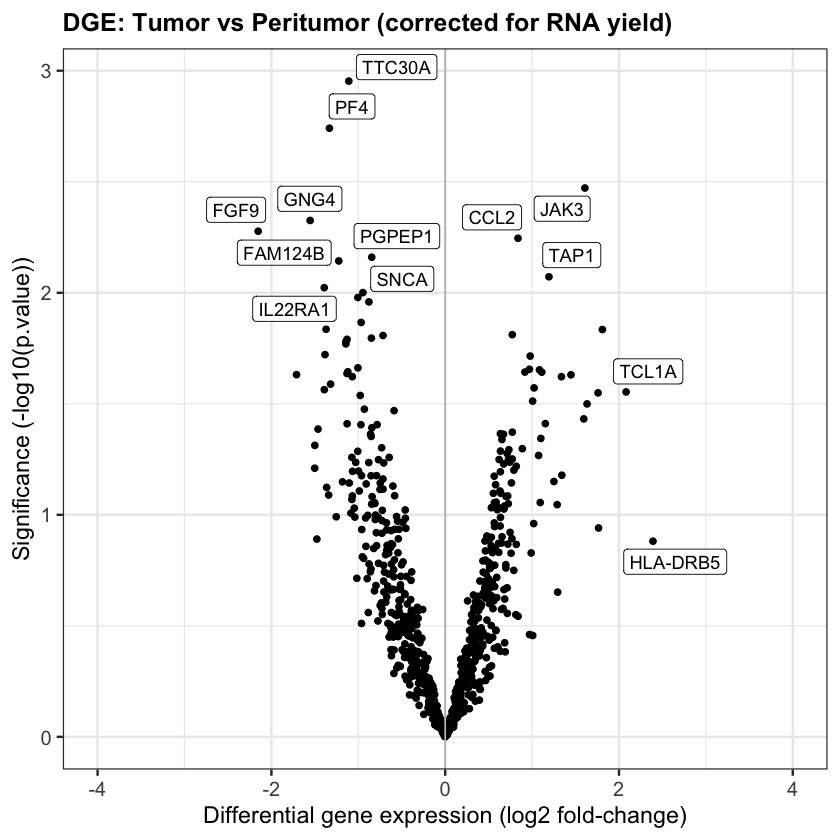

In [12]:
all_table %>%
    mutate(
        `label`=case_when(
            abs(`logFC`) >= 2 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            -log10(`P.Value`) > 2 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf, force=10) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Tumor vs Peritumor (corrected for RNA yield)'
        ) +
        xlim(-4, 4) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

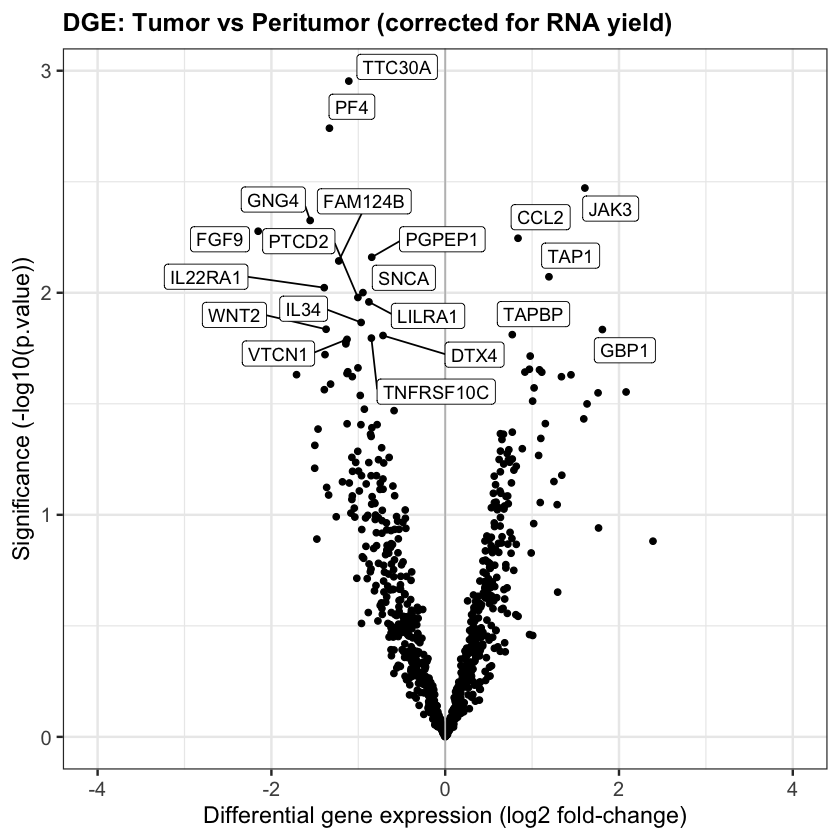

In [13]:
top_hits <-
    all_table %>%
    head(20) %>%
    pull(`gene_symbol`)

all_table %>%
    mutate(
        `label`=case_when(
            `gene_symbol` %in% top_hits ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf, force=10) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Tumor vs Peritumor (corrected for RNA yield)'
        ) +
        xlim(-4, 4) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

In [14]:
genes_of_interest <-
    c('CD3E', 'CD3D', 'CD4', 'CD8A', 'CD8B', 'NCAM1')

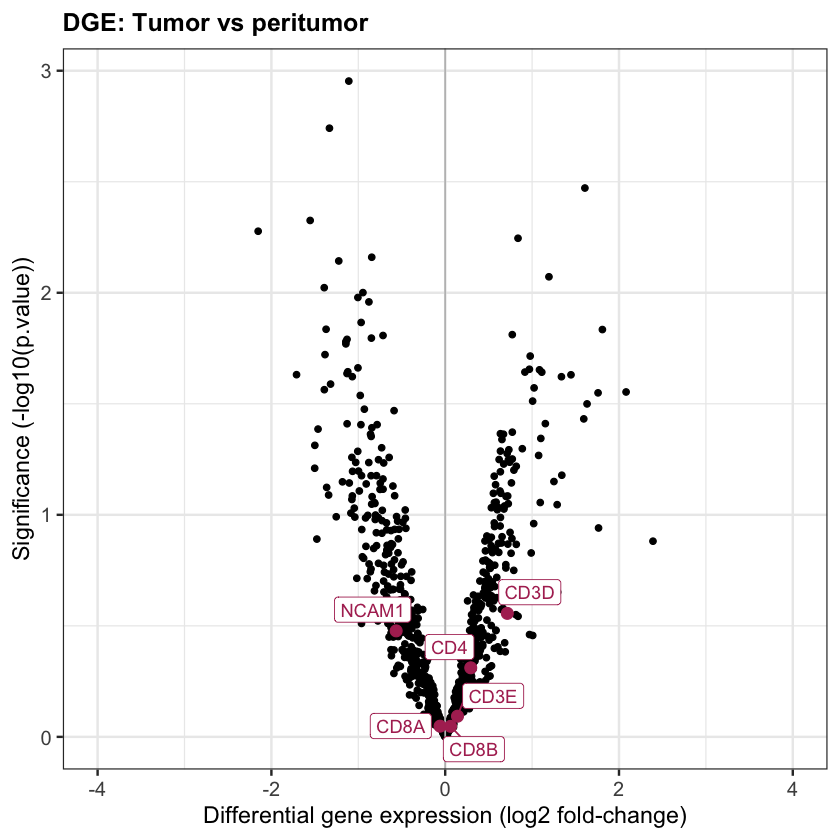

In [15]:
all_table %>%
    mutate(
        `label`=case_when(
            `gene_symbol` %in% genes_of_interest ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_point(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            size=3,
            color='maroon'
        ) +
        geom_label_repel(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            aes(label=`label`), max.overlaps=Inf, force=10,
            color='maroon'
        ) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Tumor vs peritumor'
        ) +
        xlim(-4, 4) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

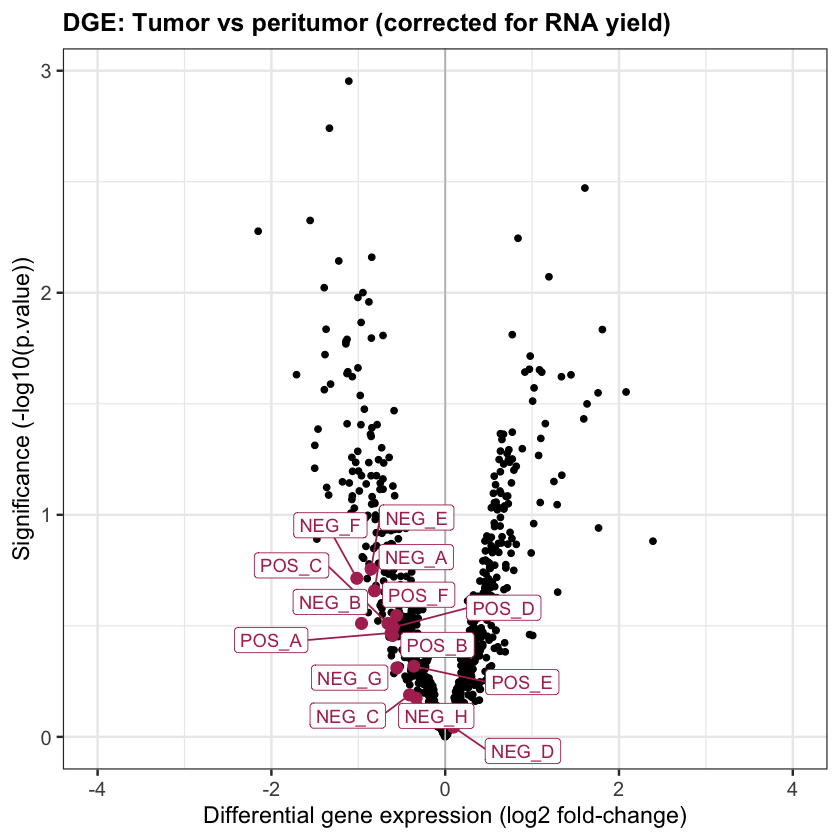

In [16]:
all_table %>%
    mutate(
        `label`=case_when(
            startsWith(`gene_symbol`, 'POS_') ~ `gene_symbol`,
            startsWith(`gene_symbol`, 'NEG_') ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_point(
            data=. %>% filter(`label` != ''),
            size=3,
            color='maroon'
        ) +
        geom_label_repel(
            data=. %>% filter(`label` != ''),
            aes(label=`label`), max.overlaps=Inf, force=10,
            color='maroon'
        ) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Tumor vs peritumor (corrected for RNA yield)'
        ) +
        xlim(-4, 4) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

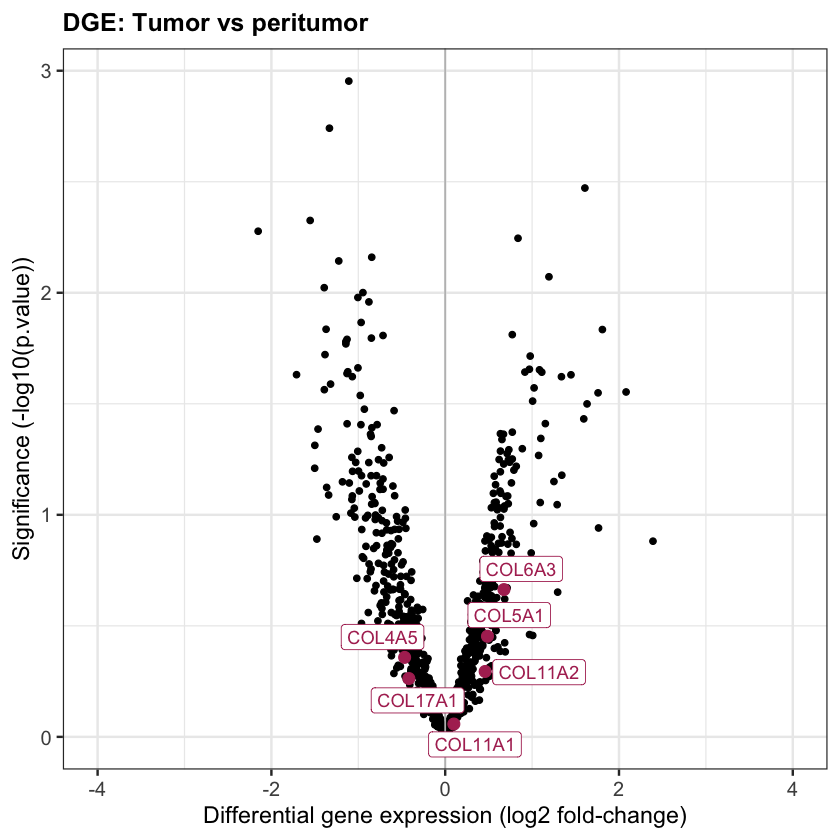

In [17]:
all_table %>%
    mutate(
        `label`=case_when(
            startsWith(`gene_symbol`, 'COL') ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_point(
            data=. %>% filter(`label` != ''),
            size=3,
            color='maroon'
        ) +
        geom_label_repel(
            data=. %>% filter(`label` != ''),
            aes(label=`label`), max.overlaps=Inf, force=10,
            color='maroon'
        ) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Tumor vs peritumor'
        ) +
        xlim(-4, 4) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )